#Base de Dados: Aluno do ensino Médio IFCE-Fortaleza, período de 2018.2 a 2020.1. 

1. Problema 

A retenção em matemática geral problema de reserva de sala, alocação de professor e aumenta a probabilidade do aluno evadir ou procura outra instituição de ensino. 

2. Objetivo

Usar algoritmos de Apredizagem de máquina para classificar alunos em Aprovados ou Reprovados em matemática ou física no S1, gerar relatório para tomada de decisão pelas coordenações.


3. Algoritmos

Regressão Logistica e Naive Bayes.



# Metodologia, descrição do banco de dados e dos passos a serem seguidos.
O banco de dados é formado por alunos ingresso nos cursos técnicos integrados do Instituição Federal – IFCE – Campus Fortaleza, abrangendo as seis modalidades disponíveis de cursos técnico integrados a partir do ano de 2018.2 até 2020.1.

Inicialmente os dados foram coletados manualmente, mas no semestre de 2022.2, elaboramos um código em Python para automatizar a coleta com web scraping.

O objetivo é determinar quais alunos tem maior probabilidade de reporvar em matemática, no primeiro semestre, de cada curso técnico, geral então um relatório para cada coordenação de curso, para que possam elabora um plano estratégico de combate a retenção no S1. Usaremos dois algoritmos de classificação: Regressão Logistica e Naive Bayes, em seguida faremos um comparativo de desempenho deles.  

**O banco de dados é composto pelas variáveis:**

1. Nota_Matemática = Média em Matemática no S1
2. Pontuação = Pontuação final no exame de seleção 	
3. Reserva_vaga = Reserva de Vaga (Cota)	
4. Curso = Curso Técnico para o qual o aluno se inscreveu	
5. Semestre = Semestre de ingresso.

Iniciamente tinhamos 682 alunos, mas na coleta das médias em matemática e física encontramos 468 alunos no sistema acadêmico da instituição, ou seja, 214 alunos não foram encontrados, um dado que será insvestigado no futuro.

**Roteiro** 

1. Inciaremos pela leitura do arquivo salvo em excel, com sua exibição para verificação de número de linhas e colunas.

2. Reordenação das Variaveis.

3. Verificação de dados Faltantes

4. Transforma a Variável semstre para string

5. Analises exploratória dos dados

6. Trasnformação das Variáveis Reserva de vaga e Curso em variáveis Dummies

7. Criação da variável Situação_Matemática, com duas categorias : 0 a 5,9 para reprovados, de 6 a 10 para aporvados com os labels 0 e 1 respectivamente.

8. Divisão do banco de dados em Regressores e Target

9. Verificação do balaceamento das Classes Aprovados e Reprovados em matemática, balancear se for necessário.

10. Aplicar a regressão logística e  determinar: acuracia balanceada,  precision,    recall,  f1-score e curva ROC.

11. Aplicar do Naive Bayes e determinar: acuracia balanceada,  precision,    recall,  f1-score e curva ROC.

12. Repetir o processo para a classificação em aprovado e reprovado em física.

13. Conclusão


In [8]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import graphviz 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz, plot_tree, export_text
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot



In [2]:
# Criando conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Abrindo o banco de dados.
Integrado = pd.read_excel('/content/drive/MyDrive/Integrado_2018.2_a_2020_1_versão31_08_2022.xlsx')
Integrado

,Nota_Matemática,Pontuação,Reserva_vaga,Curso,Semestre
0,6.7,8.22,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
1,7.5,7.96,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
2,9.8,7.79,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
3,8.4,7.52,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
4,6.7,7.32,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
...,...,...,...,...,...
463,6.0,7.00,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
464,6.3,6.83,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
465,7.4,6.79,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
466,8.1,6.33,L8,Técnico Integrado em Telecomunicações - Campus...,2020.1


In [10]:
#Exibindo as Colunas, ou seja, seus nomes.
Integrado.columns

Index(['Nota_Matemática', 'Pontuação', 'Reserva_vaga', 'Curso', 'Semestre'], dtype='object')

In [11]:
#Organizando a ordem das variáveis
Integrado=Integrado[['Semestre','Nota_Matemática', 'Pontuação', 'Reserva_vaga', 'Curso']] 
Integrado

,Semestre,Nota_Matemática,Pontuação,Reserva_vaga,Curso
0,2018.2,6.7,8.22,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
1,2018.2,7.5,7.96,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
2,2018.2,9.8,7.79,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
3,2018.2,8.4,7.52,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
4,2018.2,6.7,7.32,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
...,...,...,...,...,...
463,2020.1,6.0,7.00,L6,Técnico Integrado em Telecomunicações - Campus...
464,2020.1,6.3,6.83,L6,Técnico Integrado em Telecomunicações - Campus...
465,2020.1,7.4,6.79,L6,Técnico Integrado em Telecomunicações - Campus...
466,2020.1,8.1,6.33,L8,Técnico Integrado em Telecomunicações - Campus...


In [12]:
# convertendo o semestre da string - para podermos plotar alguns gráficos. 
Integrado['Semestre']=Integrado['Semestre'].astype(str)
Integrado

,Semestre,Nota_Matemática,Pontuação,Reserva_vaga,Curso
0,2018.2,6.7,8.22,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
1,2018.2,7.5,7.96,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
2,2018.2,9.8,7.79,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
3,2018.2,8.4,7.52,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
4,2018.2,6.7,7.32,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...
...,...,...,...,...,...
463,2020.1,6.0,7.00,L6,Técnico Integrado em Telecomunicações - Campus...
464,2020.1,6.3,6.83,L6,Técnico Integrado em Telecomunicações - Campus...
465,2020.1,7.4,6.79,L6,Técnico Integrado em Telecomunicações - Campus...
466,2020.1,8.1,6.33,L8,Técnico Integrado em Telecomunicações - Campus...


In [13]:
#Verificando se existe dados faltantes e o tipo de variaveis 
Integrado.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semestre         468 non-null    object 
 1   Nota_Matemática  468 non-null    float64
 2   Pontuação        468 non-null    float64
 3   Reserva_vaga     468 non-null    object 
 4   Curso            468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.4+ KB


# Análise exploratória dos dados

In [14]:
#Estatística descritiva da pontuação final no exame de seleção por reserva de vaga.
grup_reserva=Integrado['Pontuação'].groupby(Integrado['Reserva_vaga'])
des=grup_reserva.describe()
des

,count,mean,std,min,25%,50%,75%,max
Reserva_vaga,,,,,,,,
Ampla Concorrência,273.0,7.916484,0.706946,6.16,7.3700,8.00,8.440,9.50
L1,4.0,5.432500,0.365183,5.16,5.2425,5.30,5.490,5.97
L2,81.0,6.669877,1.040162,3.47,6.0200,6.78,7.470,9.07
L3,1.0,6.250000,NaN,6.25,6.2500,6.25,6.250,6.25
L4,19.0,6.701579,1.604779,1.22,6.0850,6.96,7.680,8.81
L6,75.0,6.422400,1.074192,2.21,5.7300,6.59,7.235,8.76
L7,1.0,0.590000,NaN,0.59,0.5900,0.59,0.590,0.59
L8,14.0,6.639286,0.754631,5.68,5.9825,6.50,7.330,7.76


Existe uma influência da reserva de vaga na média, desvio padrão, nota mínima, nota máxima e nos percetis da pontuação final no exame de seleção. 

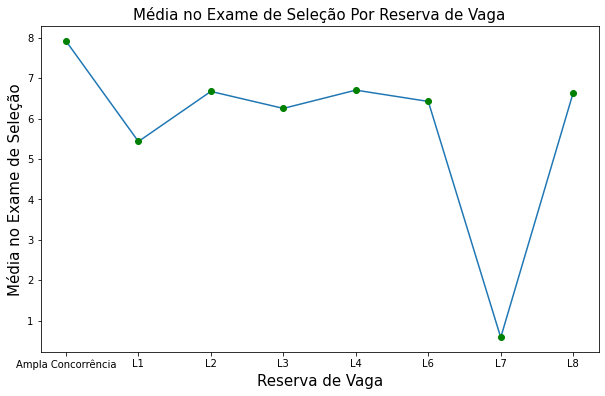

In [15]:
# Representação gráfica da pontuação final no exame de seleção por reserva de vaga.
plt.figure(figsize=(10, 6))
plt.plot(des['mean'])
plt.plot(des['mean'],'go')
plt.xlabel('Reserva de Vaga',fontsize=15)
plt.ylabel('Média no Exame de Seleção', fontsize=15)
plt.title('Média no Exame de Seleção Por Reserva de Vaga',fontsize=15 )
plt.show()

In [16]:
#Estatística descritiva da média em matemática no S1 por reserva de vaga.
grup_reserva_mat=Integrado['Nota_Matemática'].groupby(Integrado['Reserva_vaga'])
des_mat=grup_reserva_mat.describe()
des_mat

,count,mean,std,min,25%,50%,75%,max
Reserva_vaga,,,,,,,,
Ampla Concorrência,273.0,7.598535,2.195784,0.0,6.600,8.10,9.30,10.0
L1,4.0,3.025000,4.050000,0.0,1.125,1.55,3.45,9.0
L2,81.0,6.492593,2.741431,0.0,5.400,7.20,8.60,10.0
L3,1.0,1.000000,NaN,1.0,1.000,1.00,1.00,1.0
L4,19.0,6.063158,3.048900,0.0,5.050,6.50,8.10,9.8
L6,75.0,5.626667,2.687978,0.0,5.000,6.20,7.40,10.0
L7,1.0,2.700000,NaN,2.7,2.700,2.70,2.70,2.7
L8,14.0,5.300000,3.117198,1.2,2.750,6.00,7.15,10.0


A tabela acima mostra a que existe uma influência da reserva de vaga na média, desvio padrão, nota mínima, nota máxima e nos percetis da média em matemática no S1.

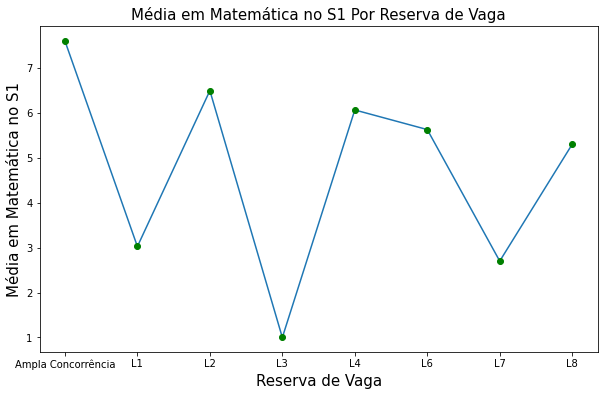

In [17]:
# Representação gráfica da média em matemática no S1 por reserva de vaga.
plt.figure(figsize=(10, 6))
plt.plot(des_mat['mean'])
plt.plot(des_mat['mean'],'go')
plt.xlabel('Reserva de Vaga',fontsize=15)
plt.ylabel('Média em Matemática no S1', fontsize=15)
plt.title('Média em Matemática no S1 Por Reserva de Vaga',fontsize=15 )
plt.show()

In [18]:
#Frequencia Absoluta da Reserva de Vaga
Reserva_Vaga = Integrado['Reserva_vaga'].value_counts() 
Reserva_Vaga

Ampla Concorrência    273
L2                     81
L6                     75
L4                     19
L8                     14
L1                      4
L7                      1
L3                      1
Name: Reserva_vaga, dtype: int64

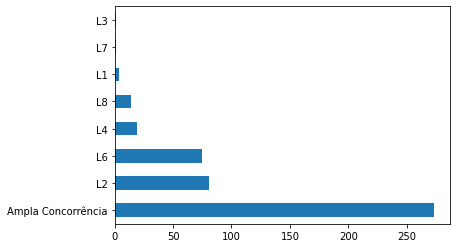

In [19]:
# Representação Gráfica da Frequencia Absoluta da Reserva de Vaga
Reserva_Vaga.plot(kind='barh') 

In [20]:
#Frequencia Relativa da Reserva de Vaga   
Reserva_Vaga_Re=Reserva_Vaga / len(Integrado['Reserva_vaga'])
Reserva_Vaga_Re=Reserva_Vaga_Re*100
Reserva_Vaga_Re

Ampla Concorrência    58.333333
L2                    17.307692
L6                    16.025641
L4                     4.059829
L8                     2.991453
L1                     0.854701
L7                     0.213675
L3                     0.213675
Name: Reserva_vaga, dtype: float64

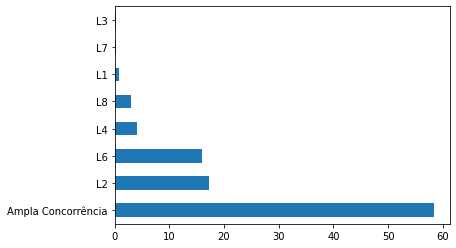

In [21]:
# Representação Gráfica da Frequencia Relativa da Reserva de Vaga
Reserva_Vaga_Re.plot(kind='barh')

In [22]:
# Frequencia Absoluta dos Cursos
Curso = Integrado['Curso'].value_counts()
Curso

Técnico Integrado em Informática - Campus Fortaleza            84
Técnico Integrado em Telecomunicações - Campus Fortaleza       81
Técnico Integrado em Eletrotécnica - Campus Fortaleza          77
Técnico Integrado em Química - Campus Fortaleza                77
Técnico Integrado em Edificações - Campus Fortaleza            75
Técnico Integrado em Mecânica Industrial - Campus Fortaleza    74
Name: Curso, dtype: int64

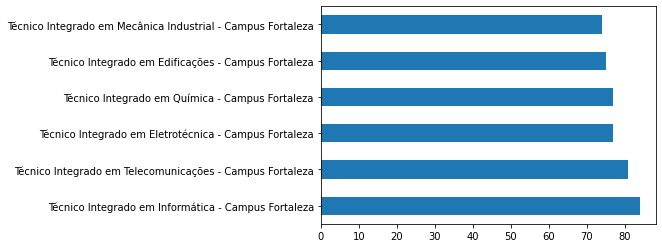

In [23]:
# Representação Gráfica da Frequencia Absoluta dos Cursos
Curso.plot(kind='barh')

In [24]:
#Frequencia Relativa dos Cursos
Curso_Re=Curso / len(Integrado['Curso'])
Curso_Re=Curso_Re*100
Curso_Re

Técnico Integrado em Informática - Campus Fortaleza            17.948718
Técnico Integrado em Telecomunicações - Campus Fortaleza       17.307692
Técnico Integrado em Eletrotécnica - Campus Fortaleza          16.452991
Técnico Integrado em Química - Campus Fortaleza                16.452991
Técnico Integrado em Edificações - Campus Fortaleza            16.025641
Técnico Integrado em Mecânica Industrial - Campus Fortaleza    15.811966
Name: Curso, dtype: float64

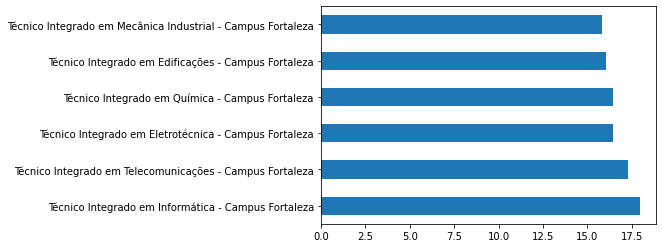

In [25]:
# Representação Gráfica da Frequencia Relativa dos Cursos
Curso_Re.plot(kind='barh')

In [26]:
#Estatística descritiva da pontuação no exame de seleção  por curso.
grup_curso=Integrado['Pontuação'].groupby(Integrado['Curso'])
des_curso=grup_curso.describe()
des_curso

,count,mean,std,min,25%,50%,75%,max
Curso,,,,,,,,
Técnico Integrado em Edificações - Campus Fortaleza,75.0,7.484800,1.030415,4.83,6.8050,7.560,8.1850,9.35
Técnico Integrado em Eletrotécnica - Campus Fortaleza,77.0,7.268442,1.094961,4.57,6.5200,7.410,8.1400,9.33
Técnico Integrado em Informática - Campus Fortaleza,84.0,7.561548,1.231914,1.22,6.9575,7.755,8.3825,9.21
Técnico Integrado em Mecânica Industrial - Campus Fortaleza,74.0,6.855000,1.180351,3.47,6.0750,7.030,7.8050,8.70
Técnico Integrado em Química - Campus Fortaleza,77.0,7.549221,1.222406,0.59,7.0100,7.670,8.3100,9.50
Técnico Integrado em Telecomunicações - Campus Fortaleza,81.0,7.249753,1.059272,2.21,6.8000,7.410,8.0000,8.99


In [27]:
#Estatística descritiva da média em matemática por curso.
grup_curso=Integrado['Nota_Matemática'].groupby(Integrado['Curso'])
des_curso_Mat=grup_curso.describe()
des_curso_Mat

,count,mean,std,min,25%,50%,75%,max
Curso,,,,,,,,
Técnico Integrado em Edificações - Campus Fortaleza,75.0,6.553333,2.255104,0.0,5.550,6.80,7.950,10.0
Técnico Integrado em Eletrotécnica - Campus Fortaleza,77.0,7.590909,2.175533,0.0,7.000,8.10,9.200,10.0
Técnico Integrado em Informática - Campus Fortaleza,84.0,6.388095,3.137546,0.0,5.000,7.45,8.800,10.0
Técnico Integrado em Mecânica Industrial - Campus Fortaleza,74.0,5.941892,3.143378,0.0,3.125,6.60,8.675,10.0
Técnico Integrado em Química - Campus Fortaleza,77.0,7.963636,2.030745,0.2,6.800,8.60,9.500,10.0
Técnico Integrado em Telecomunicações - Campus Fortaleza,81.0,6.938272,2.262055,0.0,6.300,7.40,8.600,10.0


In [28]:
# Media em Matemática e Pontuação no exame de seleção semestre e curso.
grup_curso2=Integrado.groupby(['Semestre','Curso'])
des_sem_fis2=grup_curso2.mean()
des_sem_fis2

Nota_Matemática  \
Semestre Curso                                                                 
2018.2   Técnico Integrado em Edificações - Campus Forta...         6.938095   
         Técnico Integrado em Eletrotécnica - Campus For...         8.060000   
         Técnico Integrado em Informática - Campus Forta...         2.695000   
         Técnico Integrado em Mecânica Industrial - Camp...         4.100000   
         Técnico Integrado em Química - Campus Fortaleza            7.305556   
         Técnico Integrado em Telecomunicações - Campus ...         7.846667   
2019.1   Técnico Integrado em Edificações - Campus Forta...         4.900000   
         Técnico Integrado em Eletrotécnica - Campus For...         5.850000   
         Técnico Integrado em Informática - Campus Forta...         8.794444   
         Técnico Integrado em Mecânica Industrial - Camp...         6.750000   
         Técnico Integrado em Química - Campus Fortaleza            7.220000   
         Técnico Integrado em Telecomunicações - Campus ...         6.711111   
2019.2   Técnico Integrado em Edificações - Campus Forta...         7.473684   
         Técnico Integrado em Eletrotécnica - Campus For...         8.372222   
         Técnico Integrado em Informática - Campus Forta...         6.095455   
         Técnico Integrado em Mecânica Industrial - Camp...         5.150000   
         Técnico Integrado em Química - Campus Fortaleza            8.488235   
         Técnico Integrado em Telecomunicações - Campus ...         5.695455   
2020.1   Técnico Integrado em Edificações - Campus Forta...         6.600000   
         Técnico Integrado em Eletrotécnica - Campus For...         8.162500   
         Técnico Integrado em Informática - Campus Forta...         7.929167   
         Técnico Integrado em Mecânica Industrial - Camp...         7.172727   
         Técnico Integrado em Química - Campus Fortaleza            8.772727   
         Técnico Integrado em Telecomunicações - Campus ...         7.623077   

                                                             Pontuação  
Semestre Curso                                                          
2018.2   Técnico Integrado em Edificações - Campus Forta...   6.816667  
         Técnico Integrado em Eletrotécnica - Campus For...   6.495333  
         Técnico Integrado em Informática - Campus Forta...   6.813500  
         Técnico Integrado em Mecânica Industrial - Camp...   5.869286  
         Técnico Integrado em Química - Campus Fortaleza      6.978333  
         Técnico Integrado em Telecomunicações - Campus ...   6.464667  
2019.1   Técnico Integrado em Edificações - Campus Forta...   7.155000  
         Técnico Integrado em Eletrotécnica - Campus For...   6.958500  
         Técnico Integrado em Informática - Campus Forta...   7.035556  
         Técnico Integrado em Mecânica Industrial - Camp...   6.853333  
         Técnico Integrado em Química - Campus Fortaleza      7.383500  
         Técnico Integrado em Telecomunicações - Campus ...   7.008333  
2019.2   Técnico Integrado em Edificações - Campus Forta...   7.526316  
         Técnico Integrado em Eletrotécnica - Campus For...   7.218889  
         Técnico Integrado em Informática - Campus Forta...   7.688182  
         Técnico Integrado em Mecânica Industrial - Camp...   6.615500  
         Técnico Integrado em Química - Campus Fortaleza      7.572941  
         Técnico Integrado em Telecomunicações - Campus ...   7.405000  
2020.1   Técnico Integrado em Edificações - Campus Forta...   8.459474  
         Técnico Integrado em Eletrotécnica - Campus For...   8.047083  
         Técnico Integrado em Informática - Campus Forta...   8.463333  
         Técnico Integrado em Mecânica Industrial - Camp...   7.701364  
         Técnico Integrado em Química - Campus Fortaleza      8.148636  
         Técnico Integrado em Telecomunicações - Campus ...   7.738462

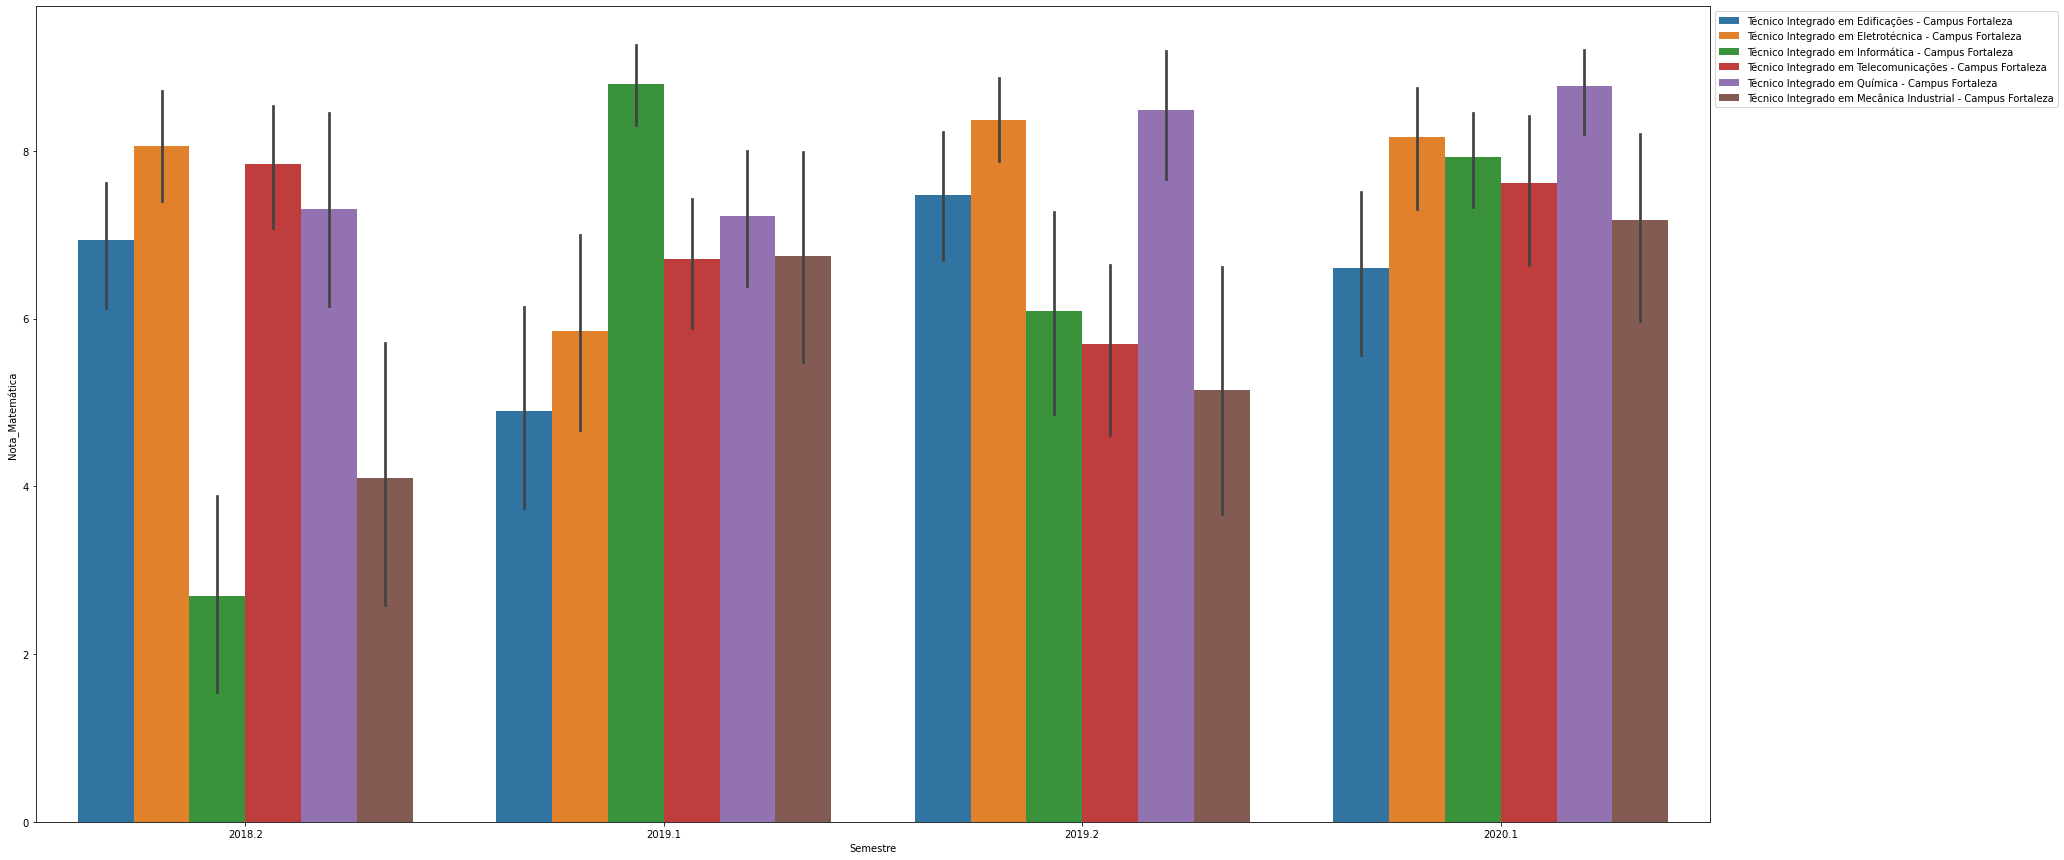

In [29]:
# Representação Gráfica da Media em Matemática, física e Pontuação no exame de seleção semestre e curso.
plt.figure(figsize=(30, 15))
sns.barplot(data=Integrado, x='Semestre',y='Nota_Matemática', hue='Curso')
plt.legend(loc = 2, bbox_to_anchor = (1,1))

In [30]:
#Estatística descritiva da média da pontuação no exame de seleção por semestre.
grup_curso=Integrado['Pontuação'].groupby(Integrado['Semestre'])
des_sem=grup_curso.describe()
des_sem

,count,mean,std,min,25%,50%,75%,max
Semestre,,,,,,,,
2018.2,103.0,6.617476,1.272604,0.59,6.0500,6.850,7.350,8.48
2019.1,110.0,7.067909,1.058272,1.22,6.5225,7.155,7.835,8.85
2019.2,118.0,7.339322,0.985214,4.49,6.8400,7.560,8.010,8.99
2020.1,137.0,8.079416,0.816043,5.93,7.6200,8.210,8.660,9.50


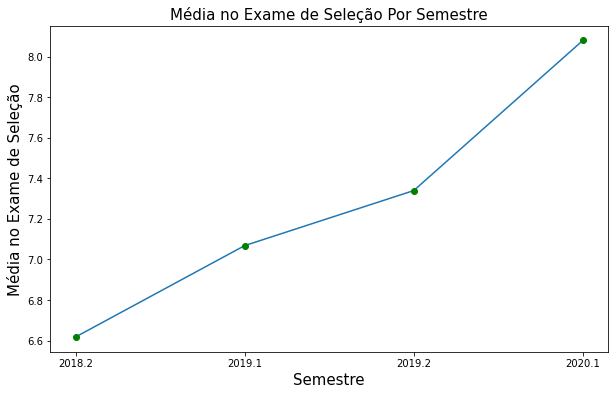

In [31]:
# Representação Gráfica da média da pontuação no exame de seleção por semestre.
plt.figure(figsize=(10, 6))
plt.plot(des_sem['mean'])
plt.plot(des_sem['mean'],'go')
plt.xlabel('Semestre',fontsize=15)
plt.ylabel('Média no Exame de Seleção', fontsize=15)
plt.title('Média no Exame de Seleção Por Semestre',fontsize=15 )
plt.show()

In [32]:
#Estatística descritiva da média em matemática no S1 por semestre.
grup_curso=Integrado['Nota_Matemática'].groupby(Integrado['Semestre'])
des_sem_mat=grup_curso.describe()
des_sem_mat

,count,mean,std,min,25%,50%,75%,max
Semestre,,,,,,,,
2018.2,103.0,6.088350,3.037585,0.0,4.700,6.90,8.400,10.0
2019.1,110.0,6.730909,2.461772,0.0,5.825,7.10,8.700,10.0
2019.2,118.0,6.774576,2.662310,0.0,6.000,7.25,8.975,10.0
2020.1,137.0,7.741606,2.133784,0.0,7.300,8.30,9.000,10.0


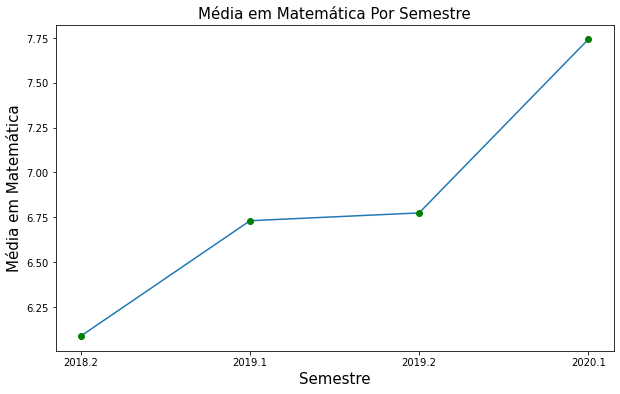

In [33]:
# Representação Gráfica da média em matemática no S1 por semestre.
plt.figure(figsize=(10, 6))
plt.plot(des_sem_mat['mean'])
plt.plot(des_sem_mat['mean'],'go')
plt.xlabel('Semestre',fontsize=15)
plt.ylabel('Média em Matemática', fontsize=15)
plt.title('Média em Matemática Por Semestre',fontsize=15 )
plt.show()

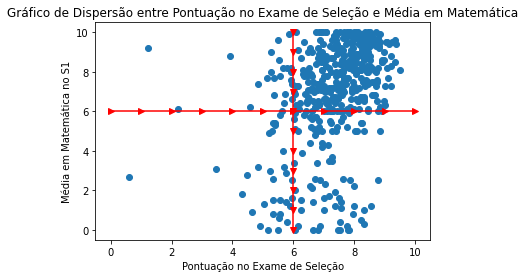

In [ ]:
#Gráfico de dispersão Pontuação no Exame de Seleção x Média em Matemáitica no S1
pyplot.scatter(Integrado['Pontuação'], Integrado['Nota_Matemática'])
x=[0,1,2,3,4,5,6,7,8,9,10]
y=[6,6,6,6,6,6,6,6,6,6,6]
x1=[0,1,2,3,4,5,6,7,8,9,10]
y1=[6,6,6,6,6,6,6,6,6,6,6]
plt.plot(x,y, label='linear', marker = '>', color = 'r')
plt.plot(y1,x1, label='linear',  marker = 'v', color =  'r')
plt.xlabel('Pontuação no Exame de Seleção')
plt.ylabel('Média em Matemática no S1')
pyplot.title('Gráfico de Dispersão entre Pontuação no Exame de Seleção e Média em Matemática')
pyplot.show()

In [34]:
#Trasnformando reserva de vaga e curso em variável dummies
Integrado1=pd.get_dummies(Integrado,columns=['Reserva_vaga','Curso'],drop_first=True)

In [35]:
#Visualização do banco
Integrado1

,Semestre,Nota_Matemática,Pontuação,Reserva_vaga_L1,Reserva_vaga_L2,Reserva_vaga_L3,Reserva_vaga_L4,Reserva_vaga_L6,Reserva_vaga_L7,Reserva_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
0,2018.2,6.7,8.22,0,0,0,0,0,0,0,0,0,0,0,0
1,2018.2,7.5,7.96,0,0,0,0,0,0,0,0,0,0,0,0
2,2018.2,9.8,7.79,0,0,0,0,0,0,0,0,0,0,0,0
3,2018.2,8.4,7.52,0,0,0,0,0,0,0,0,0,0,0,0
4,2018.2,6.7,7.32,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020.1,6.0,7.00,0,0,0,0,1,0,0,0,0,0,0,1
464,2020.1,6.3,6.83,0,0,0,0,1,0,0,0,0,0,0,1
465,2020.1,7.4,6.79,0,0,0,0,1,0,0,0,0,0,0,1
466,2020.1,8.1,6.33,0,0,0,0,0,0,1,0,0,0,0,1


In [36]:
#Criando a variável situação em matemática - categorica : Reprovado e Aprovado - Respectivamente com valores 0 e 1
Integrado1['Situação_Matemática']=pd.cut(Integrado1.Nota_Matemática, bins=[-1,5.9,10],labels=[0,1])
Integrado1

,Semestre,Nota_Matemática,Pontuação,Reserva_vaga_L1,Reserva_vaga_L2,Reserva_vaga_L3,Reserva_vaga_L4,Reserva_vaga_L6,Reserva_vaga_L7,Reserva_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza,Situação_Matemática
0,2018.2,6.7,8.22,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2018.2,7.5,7.96,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018.2,9.8,7.79,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018.2,8.4,7.52,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2018.2,6.7,7.32,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020.1,6.0,7.00,0,0,0,0,1,0,0,0,0,0,0,1,1
464,2020.1,6.3,6.83,0,0,0,0,1,0,0,0,0,0,0,1,1
465,2020.1,7.4,6.79,0,0,0,0,1,0,0,0,0,0,0,1,1
466,2020.1,8.1,6.33,0,0,0,0,0,0,1,0,0,0,0,1,1


In [37]:
#Estatística Descritiva do banco Integrado1
Integrado1.describe()

,Nota_Matemática,Pontuação,Reserva_vaga_L1,Reserva_vaga_L2,Reserva_vaga_L3,Reserva_vaga_L4,Reserva_vaga_L6,Reserva_vaga_L7,Reserva_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,6.896368,7.333312,0.008547,0.173077,0.002137,0.040598,0.160256,0.002137,0.029915,0.164530,0.179487,0.158120,0.164530,0.173077
std,2.625890,1.159813,0.092153,0.378719,0.046225,0.197569,0.367236,0.046225,0.170534,0.371152,0.384170,0.365244,0.371152,0.378719
min,0.000000,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,7.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.825000,8.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Separação do banco de dados em Regressores e Target
X_In=Integrado1.iloc[:,3:15]
y_In=Integrado1.iloc[:,15]

In [40]:
#Visualização dos Regressores
X_In

,Reserva_vaga_L1,Reserva_vaga_L2,Reserva_vaga_L3,Reserva_vaga_L4,Reserva_vaga_L6,Reserva_vaga_L7,Reserva_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
463,0,0,0,0,1,0,0,0,0,0,0,1
464,0,0,0,0,1,0,0,0,0,0,0,1
465,0,0,0,0,1,0,0,0,0,0,0,1
466,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
#Visualização dos Target
y_In

0      1
1      1
2      1
3      1
4      1
      ..
463    1
464    1
465    1
466    1
467    1
Name: Situação_Matemática, Length: 468, dtype: category
Categories (2, int64): [0 < 1]

In [42]:
#Verificação da frequencia das classes
np.unique(Integrado1['Situação_Matemática'], return_counts = True)

(array([0, 1]), array([111, 357]))

In [43]:
#Verificação de dados faltantes
Integrado1.isnull().sum()

Semestre                                                             0
Nota_Matemática                                                      0
Pontuação                                                            0
Reserva_vaga_L1                                                      0
Reserva_vaga_L2                                                      0
Reserva_vaga_L3                                                      0
Reserva_vaga_L4                                                      0
Reserva_vaga_L6                                                      0
Reserva_vaga_L7                                                      0
Reserva_vaga_L8                                                      0
Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza          0
Curso_Técnico Integrado em Informática - Campus Fortaleza            0
Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza    0
Curso_Técnico Integrado em Química - Campus Fortaleza                0
Curso_

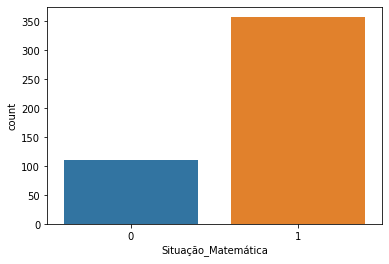

In [44]:
#Verificação do balanceamento das classes reprovado e aprovado (0 e 1)
import seaborn as sns
sns.countplot(x =Integrado1['Situação_Matemática']);

#Balanceando as Classes

In [1]:
#Importando a bibloteca para balancear as classes
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
#Verificando o número de observações e o número de variáveis em X_In (temos 468 observações e 13 variáveis)
X_In.shape

(468, 13)

In [ ]:
#Produzindo dados sinteticos para balancear as classes, aumentaremos o número de observações na classe 0, a minoritária.
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_In, y_In) 

In [ ]:
#Verificando como ficou o novo comjunto de regressores X_In, que se transformou em X_over com 714 observações
X_over.shape

(714, 13)

In [ ]:
#Verificando o numero de observações na variável target y_In, antes do balanceamento.
np.unique(y_In, return_counts=True)

(array([0, 1]), array([111, 357]))

In [ ]:
#Verificando o numero de observações na variável target y_In, agora chamada de y_over, depois do balanceamento.
np.unique(y_over, return_counts=True)

(array([0, 1]), array([357, 357]))

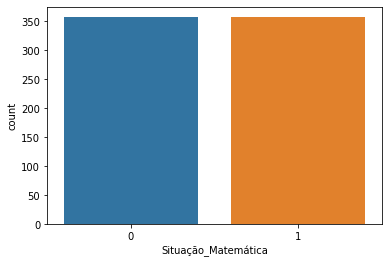

In [ ]:
#Visualização gráfica das classes depois do balanceamneto. 
import seaborn as sns
sns.countplot(x =y_over);

In [ ]:
#Divisão do conjunto em treino e teste
X_treinamento_over, X_teste_over, y_treinamento_over, y_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_treinamento_over.shape, X_teste_over.shape

((606, 13), (108, 13))

# Usando Regressão Logística

**Matriz de confusão**

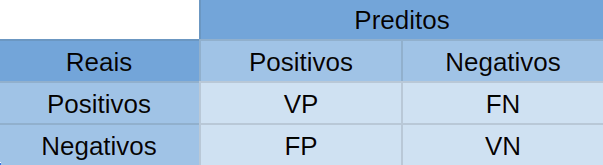

A nomenclatura que define os resultados da tabela:

VP = verdadeiro positivo. Ou seja, o dado era positivo e foi previsto como positivo

VN = verdadeiro negativo. O dado era negativo e foi previsto como negativo.

FP = falso positivo. O dado era negativo, porém foi previsto como positivo.

FN = falso negativo. O dado era positivo, porém foi previsto como negativo.

Da matriz de confusão há muita informação a ser retirada. Começando com:

**Acurácia (Acuracy)**: analisa a quantidade de acertos em relação ao total de classificações: [ (VP + VN)/(VP + VN + FP + FN) ]

**Sensibilidade (Sensitivity, Recall)**: porção de VP em relação ao total de positivos. Em outras palavras, quão bom o seu classificador é para classificar corretamente a classe de interesse. [ VP / (VP + FN) ]

**Valor Predito Positivo — Precisão (Precision)**: porção de VP em relação aos classificados como positivos. [ VP / (VP + FP) ]

**Especificidade (Specificity)**: porção de VN em relação ao total de negativos. Em outras palavas, quão bom o classificador é para classificar corretamente a outra classe. [ VN / (FP + VN) ]

**Eficiência (Efficiency)**: média aritmética entre sensibilidade e especificidade. [ (Sens + Espec)/2 ]

Interpretando esse cálculo, pense que:

**Eficiência = 1**: A única forma de ocorrer é quando Sens=1 e Espec=1. Em outras palavras, o seu classificador conseguiu acertar corretamente todos os elementos de todas as classes.

**F1- Score**

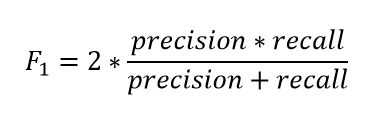

A **acurácia** basicamente faz o cálculo de todos os acertos (VP e VN) divididos por todos os acertos mais os erros (FP e FN), como é colocado na Equação 1. Porém, quando há uma classe muito desbalanceada, a acurácia não é uma boa métrica a ser usada. Pois como pode ser visto na equação, os valores de classificados VN podem mascarar a classificações baixas de VP. Transmitindo uma sensação errada de que o modelo está fazendo a classificação correta.

Uma alternativa à acurácia é utilizar a **acurácia balanceada** que não é influenciada pelo desbalanceamento das classes, porque os cálculos ocorrem em cima da taxa de verdadeiros positivos e verdadeiros negativos, como demonstrado na Equação abaixo. Logo, conseguindo chegar a um valor mais correto em relação aos acertos do modelo em relação as classes.

**Acurácia Balanceada**

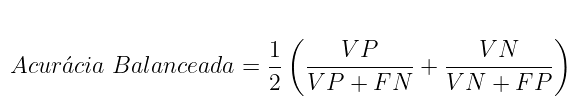

In [ ]:
#Importanto a biblioteca para realizar a regressão logistica.
from sklearn.linear_model import LogisticRegression

In [ ]:
#Treinando o algoritmo
logistic= LogisticRegression(random_state = 1)
logistic.fit(X_treinamento_over, y_treinamento_over)

LogisticRegression(random_state=1)

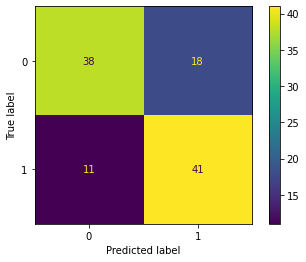

In [ ]:
#Matriz de confusão
ConfusionMatrixDisplay.from_estimator(logistic,X_teste_over, y_teste_over)
plt.show()

In [ ]:
#Calculando a Acuracia balanceada
clfs = [logistic]
indices = ['Logística']

bal_acc_results_list = []

for clf in clfs:
  train_acc = balanced_accuracy_score(y_treinamento_over, clf.predict(X_treinamento_over))
  test_acc  = balanced_accuracy_score(y_teste_over, clf.predict(X_teste_over))

  bal_acc_results_list.append({'Treino': train_acc, 'Teste': test_acc})

df_bal_acc_results = pd.DataFrame(bal_acc_results_list)

In [ ]:
#Criando gráfico
df_bal_acc_results.insert(2, "Criterio", indices, True)
df_bal_acc_results = df_bal_acc_results.set_index('Criterio')

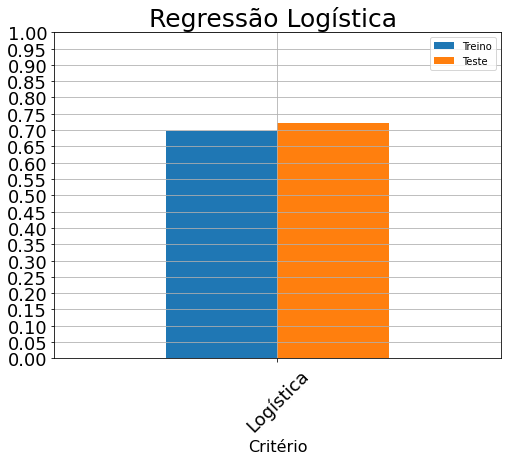

In [ ]:
#Criando gráfico
ax = df_bal_acc_results.plot.bar(figsize=[8,6], legend=True, fontsize=18, rot=45, grid=True, 
                            yticks=[0.0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8, 0.85, 0.9, 0.95, 1.0], 
                            ylim=[0.0, 1.0])
ax.set_title(label='Regressão Logística ', fontsize=25)
ax.set_xlabel(xlabel='Critério', fontsize=16)
plt.show()

In [ ]:
#Criando a lista de previsões com os regressores X_over e quardando as observações 
observado2 =y_over
previsto2 = logistic.predict(X_over)

In [ ]:
#Calculando precision, recall, f1-score
from sklearn import metrics
print(metrics.classification_report(observado2, previsto2))
print(metrics.confusion_matrix(observado2, previsto2))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       357
           1       0.69      0.72      0.71       357

    accuracy                           0.70       714
   macro avg       0.70      0.70      0.70       714
weighted avg       0.70      0.70      0.70       714

[[242 115]
 [ 99 258]]


In [ ]:
#Divisão em Treino e Teste
#X_treinamento_over, X_teste_over, y_treinamento_over, y_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
#X_treinamento_over.shape, X_teste_over.shape

((606, 13), (108, 13))

In [ ]:
#
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(logistic, X_treinamento_over,y_treinamento_over, cv=3, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_treinamento_over,y_scores)

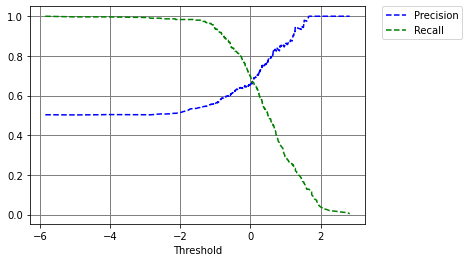

In [ ]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

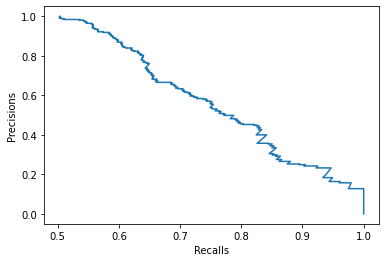

In [ ]:
plt.ylabel('Precisions')
plt.xlabel('Recalls')
plt.plot(precisions, recalls)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr,thresholds=roc_curve(y_treinamento_over,y_scores)
roc_auc = auc(fpr, tpr)
#label='ROC curve (area = %0.2f)' % roc_auc
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

**Curva ROC e AUC em Machine Learning**

A Curva ROC (Receiver Operating Characteristic) e a AUC (Area Under the Curve) são ferramentas poderosas para medir e comparar o desempenho de modelos de classificação binários, em machine learning. 

A Curva ROC é um gráfico simples, mas robusto, que permite estudar a variação da sensibilidade e especificidade, para diferentes pontos de corte na probabilidade estimada (thresholds). A AUC é uma medida de área que facilita a comparação entre Curvas ROC. 

O que é a Curva ROC (Receiver Operating Characteristic) ?

Uma curva ROC é capaz de demonstrar o desempenho de um modelo de machine learning, que seja um classificador binário, por meio da relação da Taxa de Verdadeiro Positivo (Sensibilidade) e da Taxa de Falso Positivo (1-Especificidade), variando o threshold (ponto de corte na probabilidade estimada).

Veja que um modelo de classificação binária geralmente é capaz de fornecer uma probabilidade da variável target ser =1, e não uma resposta fixa de 0 ou 1. Sendo assim, é possível definirmos diversos thresholds, que:

1. irão definir as labels da predição do algoritmo entre 0 e 1 (quanto mais próximo de 1 o threshold, mais valores serão preditos como 0; quanto mais próximo de 0 o threshold, mais valores serão preditos como 1);


2. irão permitir calcular diversas taxas de (i) verdadeiro positivo e de (ii) falso positivo para cada nível de threshold, que serão justamente as duas colunas de dados necessárias para criar o gráfico da Curva ROC.

Dessa forma, a Curva ROC permite encontrar o threshold em que existe otmização da sensibilidade em função da especificidade. O ponto onde ocorre esta otimização é aquele que se encontra mais próximo do canto superior esquerdo do gráfico da curva ROC. Ou seja:

O objetivo de analisar o poder preditivo de um modelo é garantir que ele irá detectar o máximo possível de verdadeiros positivos, enquanto minimiza os falsos positivos.

**Como construir a Curva ROC?**

Para construir a Curva ROC é preciso:

1. elencar os dados em ordem decrescente da probabilidade estimada pelo modelo;
2.calcular a taxa de verdadeiro positivo (será o eixo y da curva) e a taxa de falso positivo (que será o eixo x da curva) para cada linha (sempre considerando de forma cumulativa). Neste passo considera-se a probabilidade estimada da linha como sendo o threshold.
3.criar o gráfico com a taxa de verdadeiro positivo no eixo Y e a taxa de falso positivo no eixo X.

Neste [link](https://docs.google.com/spreadsheets/d/10FdAsAUUugwSAVMxgLl2Dqs_YO81SNVSrmCmvG01oo8/edit#gid=1592930993) preparei uma planilha com um exemplo para você entender melhor os passos citados.

Veja a figura a seguir, que demonstra como a Curva ROC se comporta ao longo de diferentes pontos de corte (thresholds) na probabilidade.



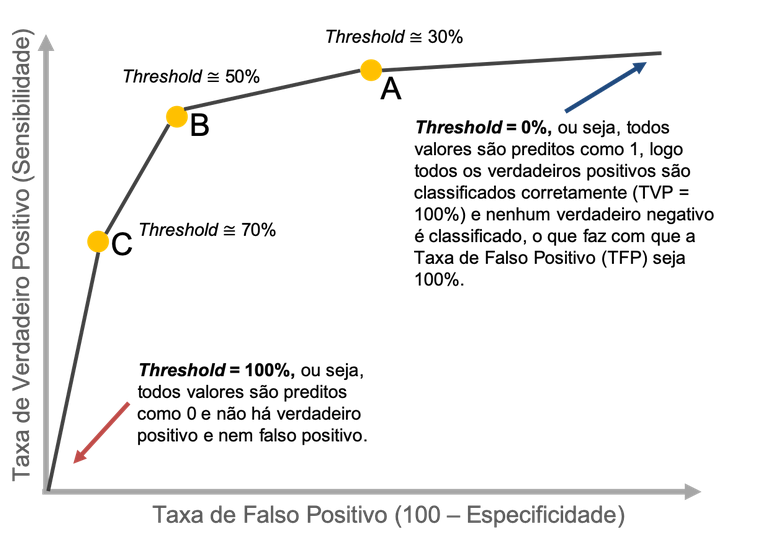

**Exemplos de Curva ROC para casos hipotéticos**

As descrições e as imagens a seguir demonstram alguns exemplos de como ficam as curvas ROC para casos hipotéticos:

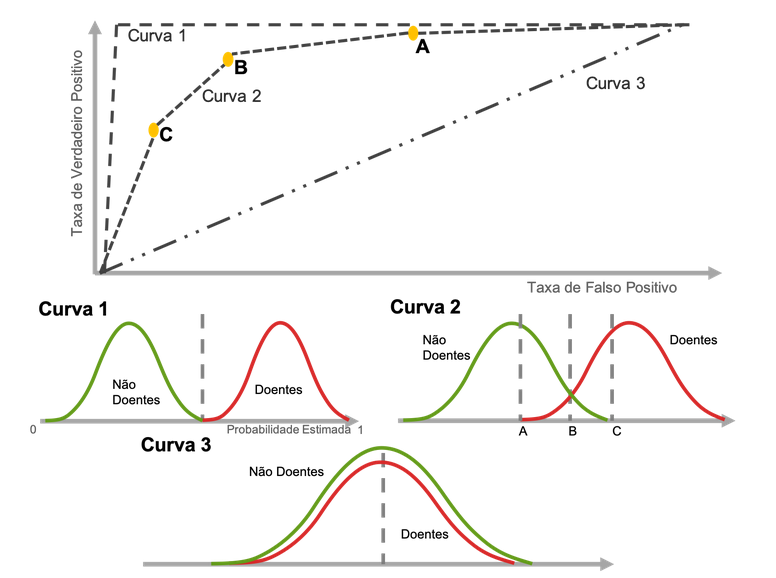




1. Curva 1 – Modelo perfeito: a medida que o threshold vai diminuindo o modelo nunca comete um falso positivo e a taxa de verdadeiro positivo está sempre em 100%.

2. Curva 2 – Modelo usual: comete alguns falsos positivos e falsos negativos.

2. Curva 3 – Modelo que não agrega: um modelo que não agrega nada a mais em relação a chutes aleatórios.

Há ainda os modelos (não demonstrados graficamente aqui) que são piores que o caso aleatório. Nestes casos a curva fica abaixo da curva 3 apresentada.

**Considerações importantes sobre a construção da Curva ROC**

Alguns pontos:

1. Quando o threshold é 1, então todos os valores serão preditos como 0, o que faz com que não haja nenhuma verdadeiro positivo e nenhum falso positivo. O que torna a TVP = 0 e a TFP = 0.
2. A medida em que o threshold é reduzido, começam a surgir os casos de verdadeiro positivo e falso positivo, aumentando as TVP e TFP.
3.A ideia é que os verdadeiros positivos (VP) sejam clasificados em um número maior possível a medida que o threshold é reduzido, antes que os falsos positivos comecem a aumentar muito.
4. O threshold ótimo pode ser escolhido pelo ponto onde a variação do crescimento do crescimento da curva ROC começa a cair. Em outras palavras, no ponto em que temos a maior possível TVP para a menor possível TFP.
5. O modelo utópico perfeito classifica todos os verdadeiros positivos corretamente sem nenhum falso positivo, tendo TVP = 100% e TFP = 0%.
6. Se o threshold for 0, então todos valores serão preditos como 1, o que faz com que todos os verdadeiros positivos sejam classificados corretamente (TVP = 100%) e nenhum verdadeiro negativo seja classificado. Como não há verdadeiro negativo, então a Taxa de Falso Positivo (TFP) é 100% também.


**O que é AUC (Area Under the Curve)?**

Em alguns casos práticos a Curva ROC não fica tão “suave” como nos exemplos didáticos. Isto ocorre por algumas razões, como:

1. Não há muitos dados de teste, sobre os quais o modelo é aplicado e avaliado;
2. Características específicas do modelo aplicado que fazem com que diversas linhas de dados similares tenha a mesma probabilidade estimada.

Nestes casos pode ficar difícil comparar visualmente qual modelo possui melhor Curva ROC, pois as curvas podem se cruzar em diferentes pontos.

É aí que entra a Area Under the Curve (AUC), a área do gráfico que fica sob a curva.

O valor do AUC varia de 0,0 até 1,0, ou de 0% a 100%. Quanto maior o AUC, melhor.

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1.

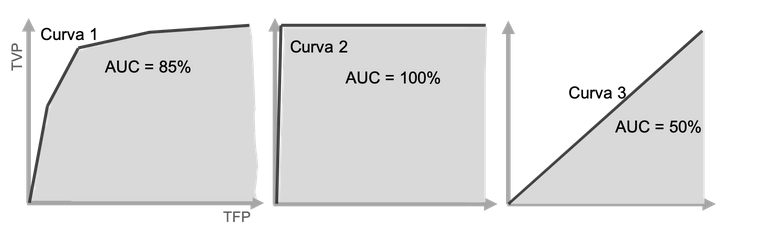

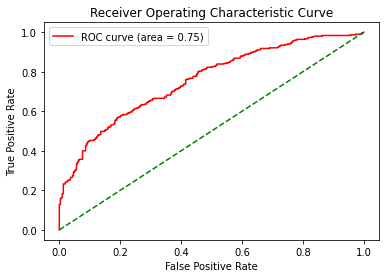

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()

# Usando Naive Bayes

In [ ]:
from sklearn.naive_bayes import  GaussianNB

In [3]:
naive = GaussianNB()
naive.fit(X_treinamento_over, y_treinamento_over)
previsoes2 = naive.predict(X_teste_over)
previsoes2

NameError: name 'GaussianNB' is not defined

In [ ]:
clfs3 = [naive]
indices = ['Naive Bayes']

bal_acc_results_list = []

for clf in clfs3:
  train_acc = balanced_accuracy_score(y_treinamento_over, clf.predict(X_treinamento_over))
  test_acc  = balanced_accuracy_score(y_teste_over, clf.predict(X_teste_over))

  bal_acc_results_list.append({'Treino': train_acc, 'Teste': test_acc})

df_bal_acc_results = pd.DataFrame(bal_acc_results_list)

In [ ]:
df_bal_acc_results.insert(2, "Critério", indices, True)
df_bal_acc_results = df_bal_acc_results.set_index('Critério')

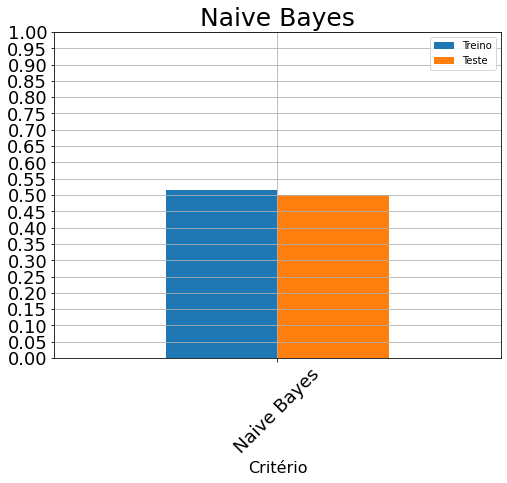

In [ ]:
ax = df_bal_acc_results.plot.bar(figsize=[8,6], legend=True, fontsize=18, rot=45, grid=True, 
                            yticks=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8, 0.85, 0.9, 0.95, 1.0], 
                            ylim=[0.0, 1.0])
ax.set_title(label='Naive Bayes', fontsize=25)
ax.set_xlabel(xlabel='Critério', fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(naive, X_treinamento_over,y_treinamento_over, cv=3)

In [ ]:
observado2 =y_over
previsto2 = naive.predict(X_over)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(observado2, previsto2))
print(metrics.confusion_matrix(observado2, previsto2))

              precision    recall  f1-score   support

           0       0.69      0.05      0.09       357
           1       0.51      0.98      0.67       357

    accuracy                           0.51       714
   macro avg       0.60      0.51      0.38       714
weighted avg       0.60      0.51      0.38       714

[[ 18 339]
 [  8 349]]


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_treinamento_over,y_scores)

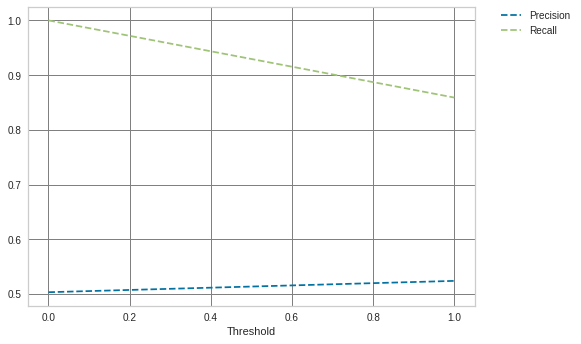

In [ ]:
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.show()

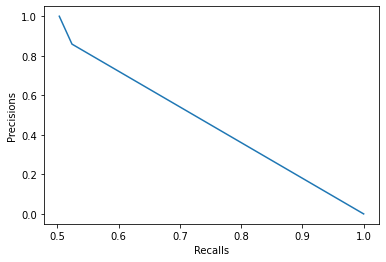

In [ ]:
plt.ylabel('Precisions')
plt.xlabel('Recalls')
plt.plot(precisions, recalls)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr,thresholds=roc_curve(y_treinamento_over,y_scores)
roc_auc = auc(fpr, tpr)
#label='ROC curve (area = %0.2f)' % roc_auc
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

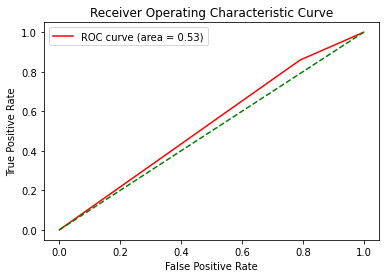

In [ ]:
plot_roc_curve(fpr, tpr)
plt.show()